<a href="https://colab.research.google.com/github/Dev-Atom42/MachineLearning-Calobaratory/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

In [41]:
!pip install datasets seaborn
!apt install neofetch
!neofetch
!uname -a
!free -h
!sleep 5
!echo "virtual linux machine"
!echo "rm -rf /"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
neofetch is already the newest version (7.1.0-3).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
            .-/+oossssoo+/-.
        `:+ssssssssssssssssss+:`
      -+ssssssssssssssssssyyssss+-
    .ossssssssssssssssssdMMMNysssso.
   /ssssssssssshdmmNNmmyNMMMMhssssss/
  +ssssssssshmydMMMMMMMNddddyssssssss+
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/
  +sssssssssdmydMMMMMMMMddddyssssssss+
   /ssssssssssshdmNNNNmyNMMMMhssssss/
    .ossssssssssssssssssdMMMNysssso.
      -+sssssssssssssssssyyyssss+-
        `:+ssssssssssssssssss+:`
            .-/+oossssoo+/-.
root@83e3fd2c091a 
----------------- 
OS:

In [42]:
!ip a

1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
7: eth0@if8: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 1500 qdisc noqueue state UP group default 
    link/ether 02:42:ac:1c:00:0c brd ff:ff:ff:ff:ff:ff link-netnsid 0
    inet 172.28.0.12/16 brd 172.28.255.255 scope global eth0
       valid_lft forever preferred_lft forever


In [43]:
!echo "Удалённо не подключишься :("

Удалённо не подключишься :(


In [44]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [45]:
df = pd.read_csv('/content/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

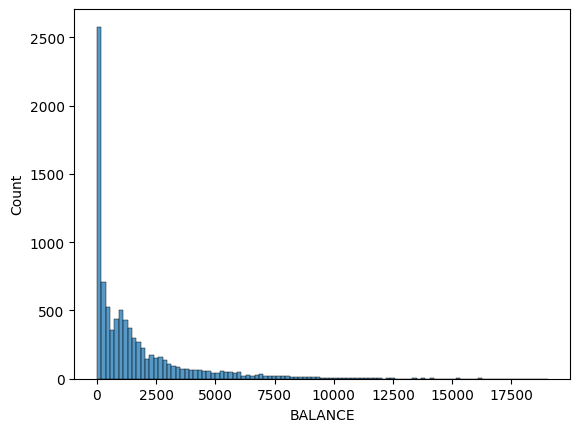

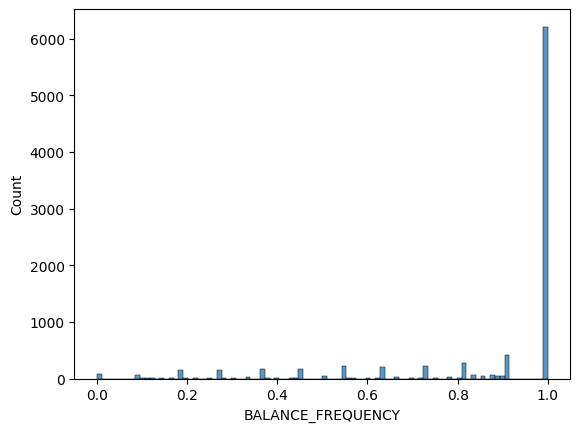

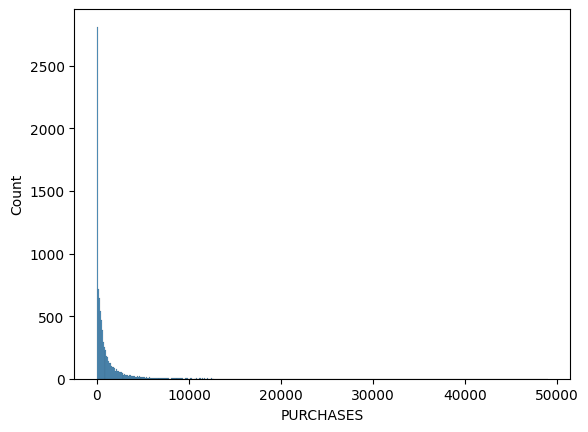

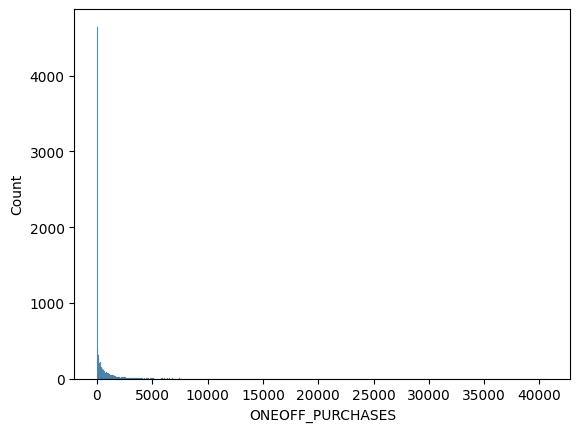

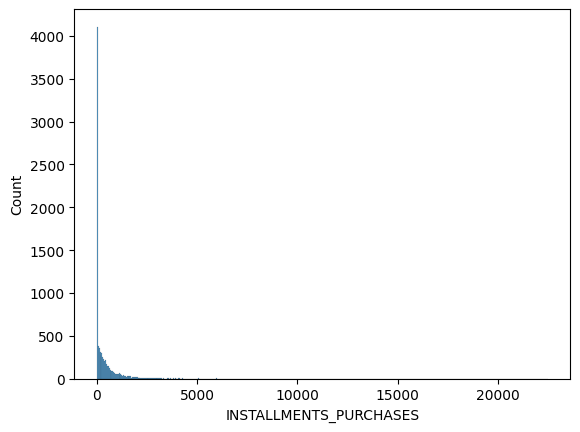

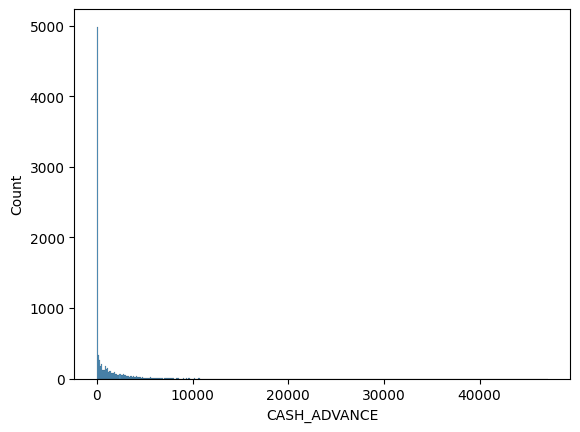

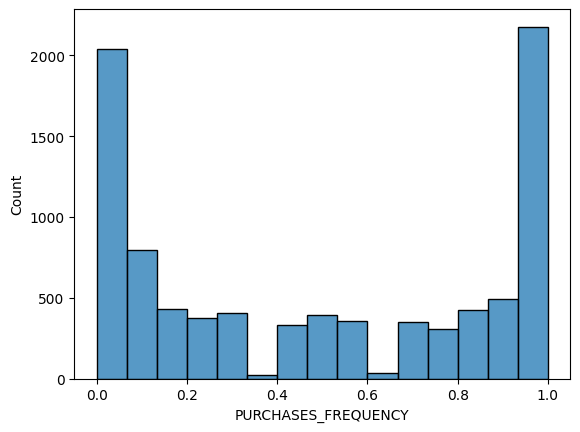

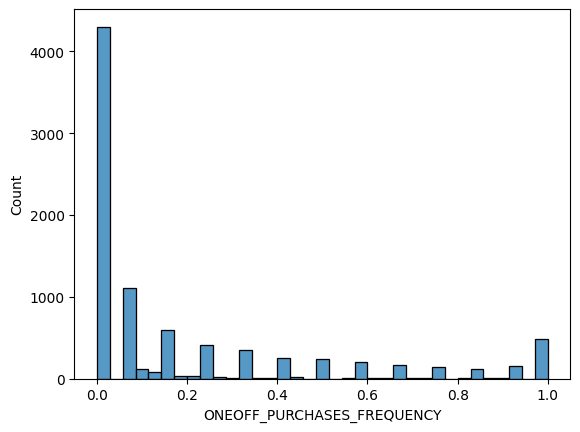

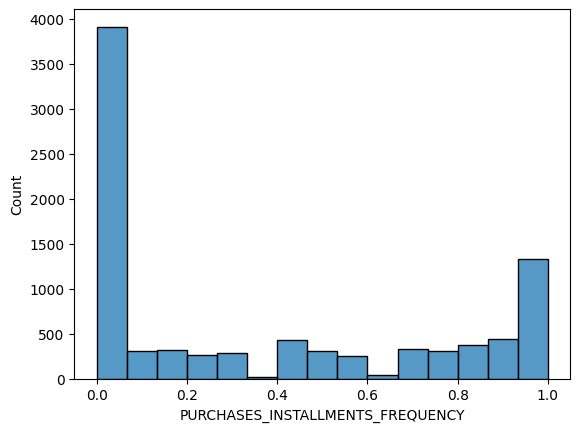

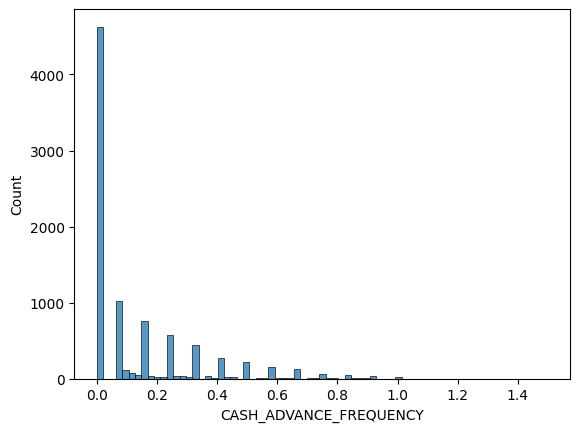

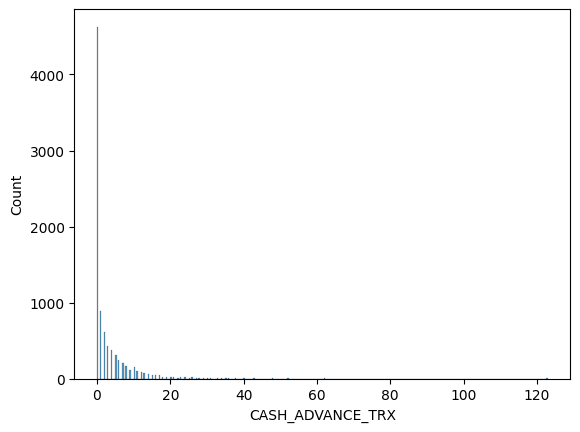

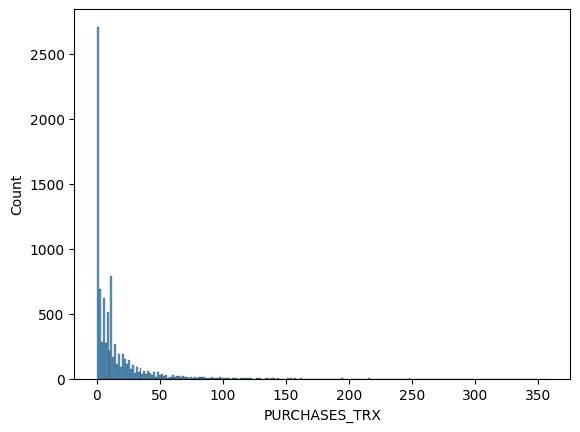

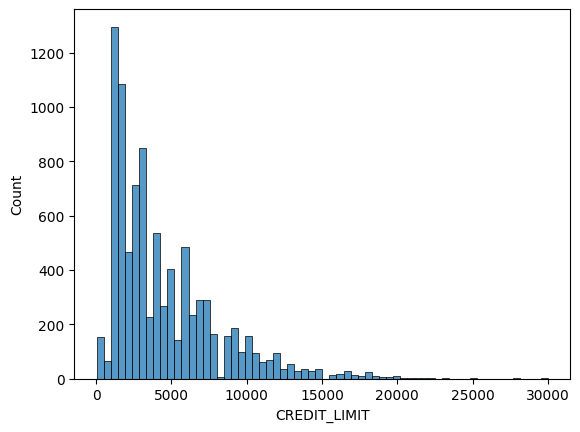

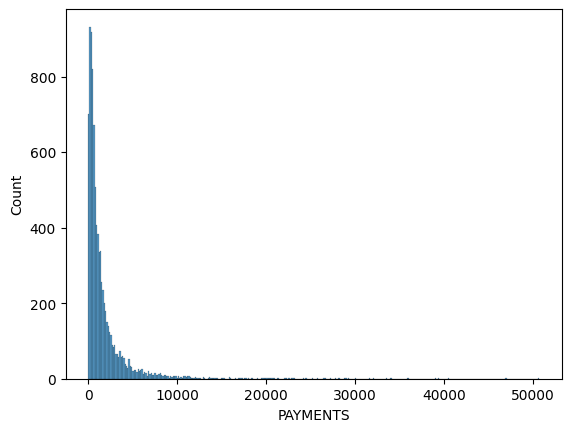

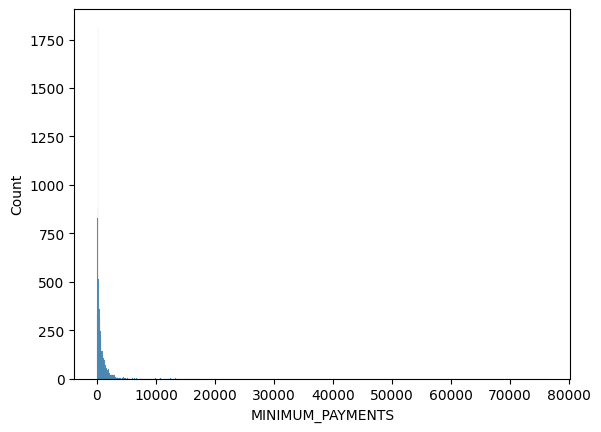

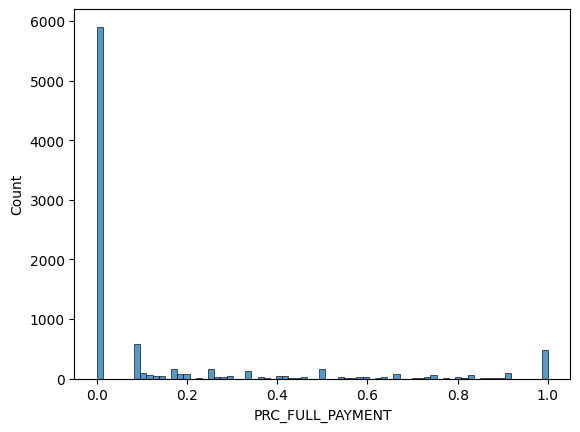

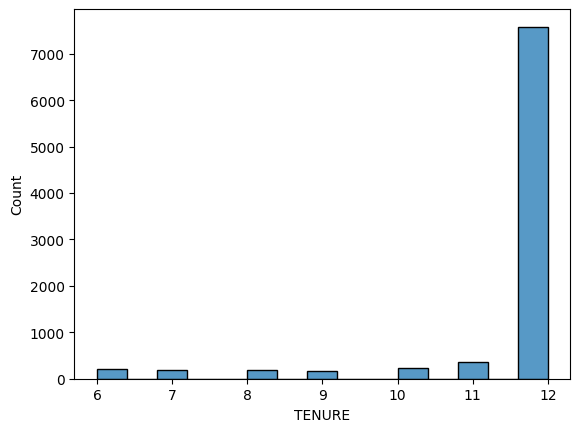

In [46]:
"""
Код здесь
"""
df = df.drop('CUST_ID', axis=1) #Убираем лишний столбец
for column in df.columns:
    plt.figure()
    sns.histplot(df[column])
    plt.show()

In [59]:
!echo "Чем больше BALANCE, тем меньше COUNT. Т.е. у большинства людей денег не так уж и много"

Чем больше BALANCE, тем меньше COUNT. Т.е. у большинства людей денег не так уж и много


In [48]:
!echo "CREDIT LIMIT у большинства низкий"

CREDIT LIMIT у большинства низкий


In [49]:
!echo "Большинство всех purchases не слишком дорогие, чем дороже покупка, тем меньше покупателей"

Большинство всех purchases не слишком дорогие, чем дороже покупка, тем меньше покупателей


In [50]:
!echo "Люди покупают очень часто (ну и тех кто не покупает тоже много, но чуть поменьше тех, кто покупает часто). Людей, которые покупают в рассрочку, больше, чем людей, которые покупают сразу"

Люди покупают очень часто (ну и тех кто не покупает тоже много, но чуть поменьше тех, кто покупает часто). Людей, которые покупают в рассрочку, больше, чем людей, которые покупают сразу


Вывод: в общем всё друга от друга тут явно зависит. Покупки связаны с балансом, так же как и кредит лимит.

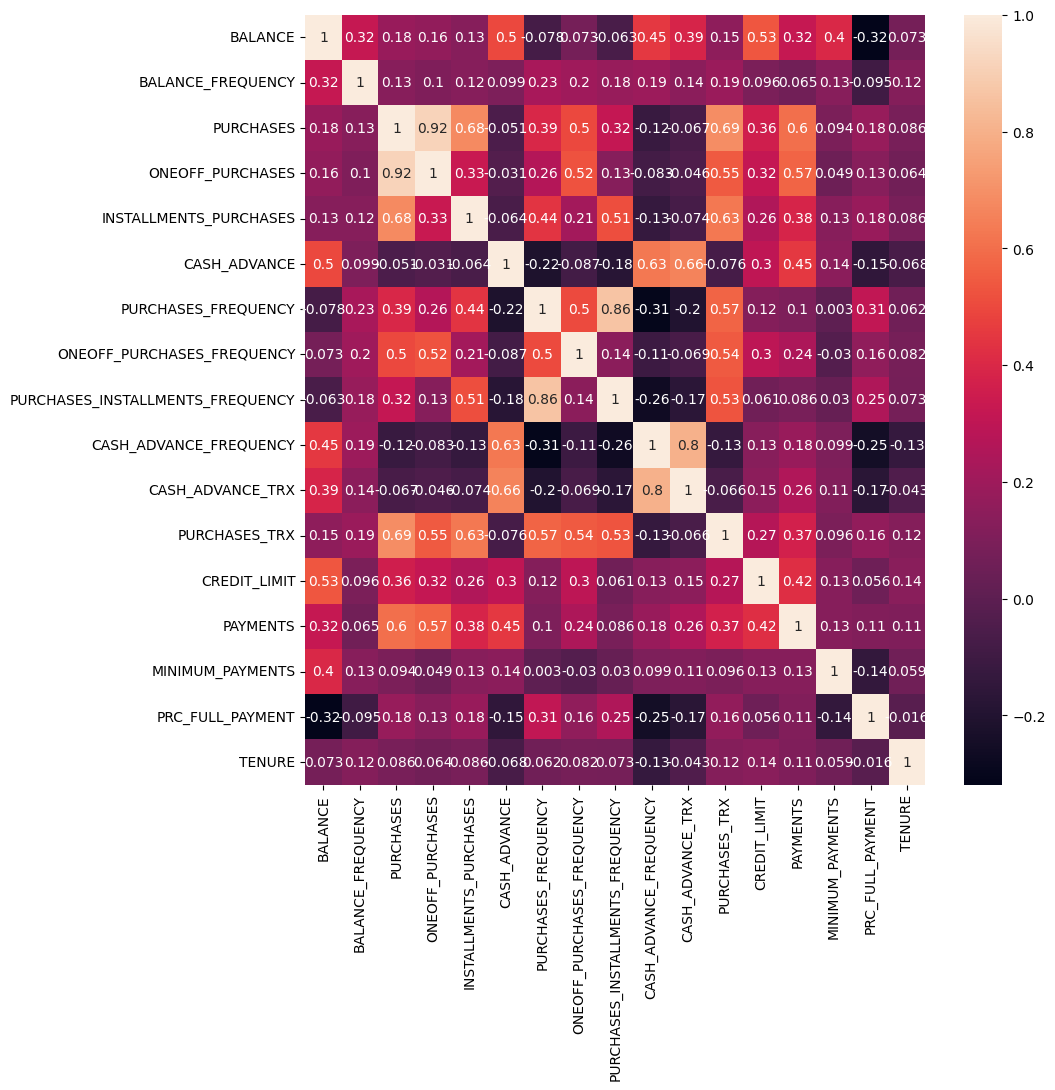

In [51]:
#МОЖНО
#ПОПРОБОВАТЬ
#СДЕЛАТЬ
#МАТРИЦУ
#КОРРЕЛЯЦИИ

correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Как по мне не наглядно, но что-то понять можно

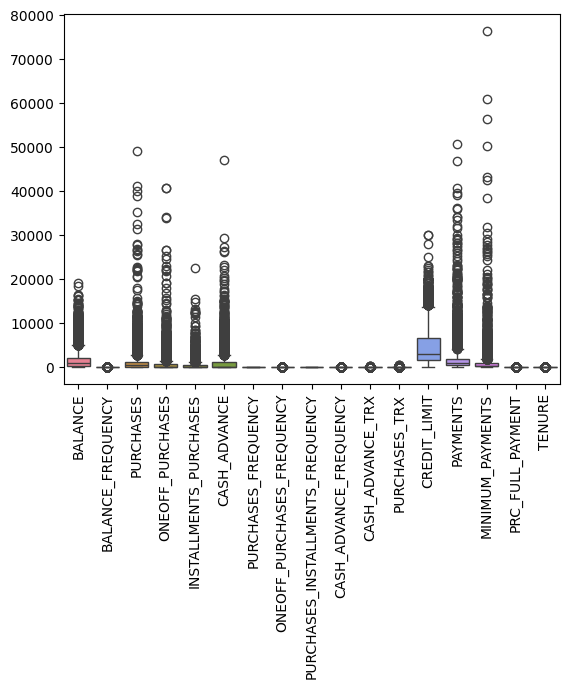

In [52]:
#ПОПРОБУЕМ ТАКОЕ
plt.figure()
plt.xticks(rotation=90)
sns.boxplot(data=df)
plt.show()

Ужас, как много выбросов.

In [53]:
#Попробую заменить пропуски (Всё проанализировано ещё в 4-й работе)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True) #один пропуск был
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True) #300 с чем-то пропусков было

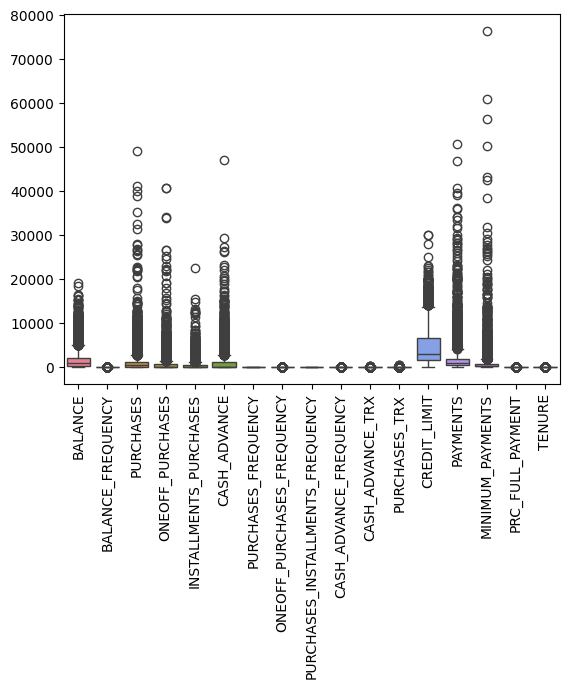

In [58]:
#ПО НОВОЙ
plt.figure()
plt.xticks(rotation=90)
sns.boxplot(data=df)
plt.show()

Внешне MINIMUM_PAYMENTS не поменялся (ну и сам по себе он особо то и не поменятся, медианное значение не выходит в зону выброса), ну и ладно

Какой же можно сделать вывод?
Думаю в качестве Y стоит выбрать BALANCE, т.к. всё крутится вокруг него (как и было сказано выше).
Какие элементы влияют/зависят от BAlANCE так же было написано выше. Вот данные элементам мы сейчас и воспользуемся.

In [60]:
new_data[['BALANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'PURCHASES']]
from sklearn.model_selection import train_test_split
y = data_scaled.BALANCE
X = data_scaled.drop('BALANCE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test

NameError: name 'data_scaled' is not defined

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [54]:
"""
Код здесь
"""

'\nКод здесь\n'

### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [55]:
"""
Код здесь
"""

'\nКод здесь\n'

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [56]:
"""
Код здесь
"""

'\nКод здесь\n'

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [57]:
"""
Результат работы
"""

'\nРезультат работы\n'